# Lab Work Week 7

# Lab Work 1

## Manually Calculated K-Means Clustering

### Step 1 - Preparation

In [1]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
df = pd.read_csv('C:\Machine Learning\week7\Iris.csv')

# Peek Data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2 - Select Features and Label

In [2]:
# Select Features
X = df.iloc[:, 1:-1] # slice features vector
y = df.iloc[:, -1] # slice data labels

### Step 3 - Visualize The Data

Result,


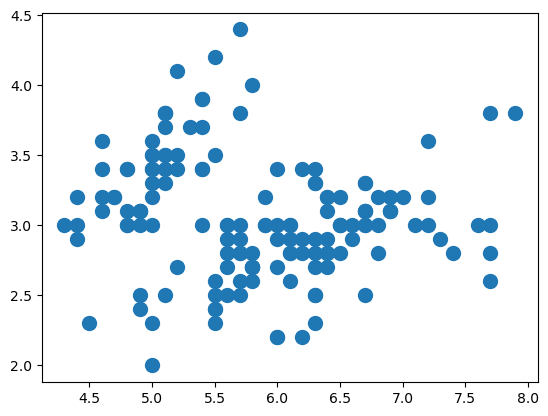

In [3]:
# Plot Data
# We have 4 dimensional feature space
# Thereofe, we only plot the cluster based on Sepal Length and Sepal Width only
print('Result,')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

### Step 4 - Make K-Means Model

In [4]:
# Create K-Means Model
# In this model, we only just create a model with k = 2 even we already know the total of Iris dataset label is 3.

from sklearn.cluster import KMeans

# Instantiation K-Means Model
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Step 5 - Check Cluster

Result,


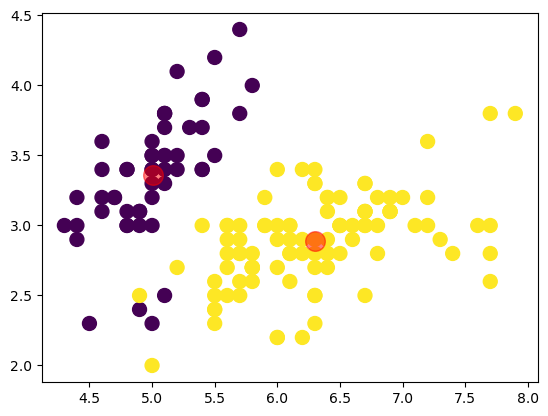

In [5]:
# Plot cluster based on Sepal Length and Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
print('Result,')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Step 6 - Evaluate Model

In [6]:
# Check the value of SSE
print('Result (it may be varry),')
print(f'SSE: {cl_kmeans.inertia_}')

Result (it may be varry),
SSE: 152.36870647733906


### Step 7 - Find The Optimum K

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

Result,


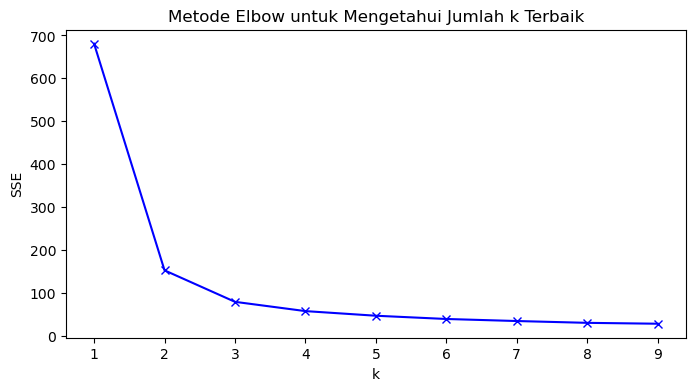

In [7]:
# Implementasi Metode Elbow

# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
print('Result,')
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Check SSE value for each k

In [8]:
# Check SSE value for each k
print('Result (it may be varry), ')
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

Result (it may be varry), 
k=1; SSE=680.8244
k=2; SSE=152.36870647733906
k=3; SSE=78.94084142614602
k=4; SSE=57.31787321428571
k=5; SSE=46.535582051282056
k=6; SSE=38.95701115711985
k=7; SSE=34.19698216257427
k=8; SSE=29.95408642103722
k=9; SSE=27.909642951251644


# Lab Work 2
Clustering on Unstructured Data

## Case 1: Numerical Images
### Step 1 - Load Data

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

### Step 2 - Make K-Means Model

In [10]:
# Create K-Means model
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

### Step 3 - Plot Digits Cluster

Result,


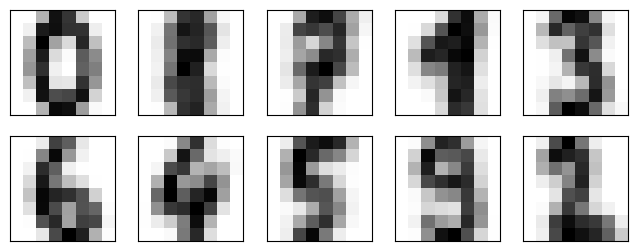

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
print('Result,')
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Step 4 - Labeling Based on The Cluster

In [12]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

C:\Users\ACER\AppData\Local\Temp\ipykernel_15084\1054570171.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


### Step 5 - Evaluate Based Using Accuract Metric

In [13]:
from sklearn.metrics import accuracy_score
print('Result (it may be varry),')
accuracy_score(digits.target, labels)

Result (it may be varry),


0.7918753478018921

Check the confusion matrix result,

Result,


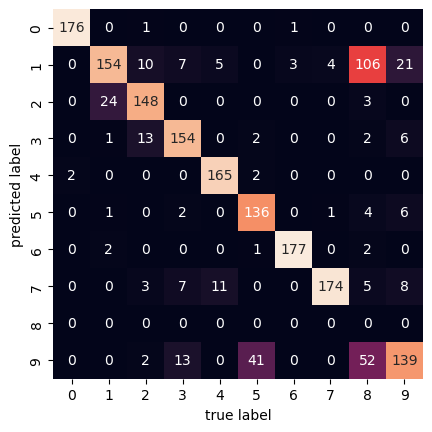

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
print('Result,')
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Case 2: Image Compression
### Step 1 - Load Data

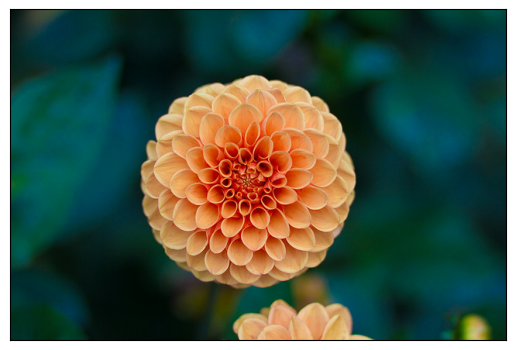

In [15]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

Check the image shape,

In [16]:
flower.shape

# Result,
# (427, 640, 3)

(427, 640, 3)

### Step 2 - Normalize The Pixel Value

In [17]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

### Step 3 - Plot The Pixel Distribution

In [18]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Call the function,

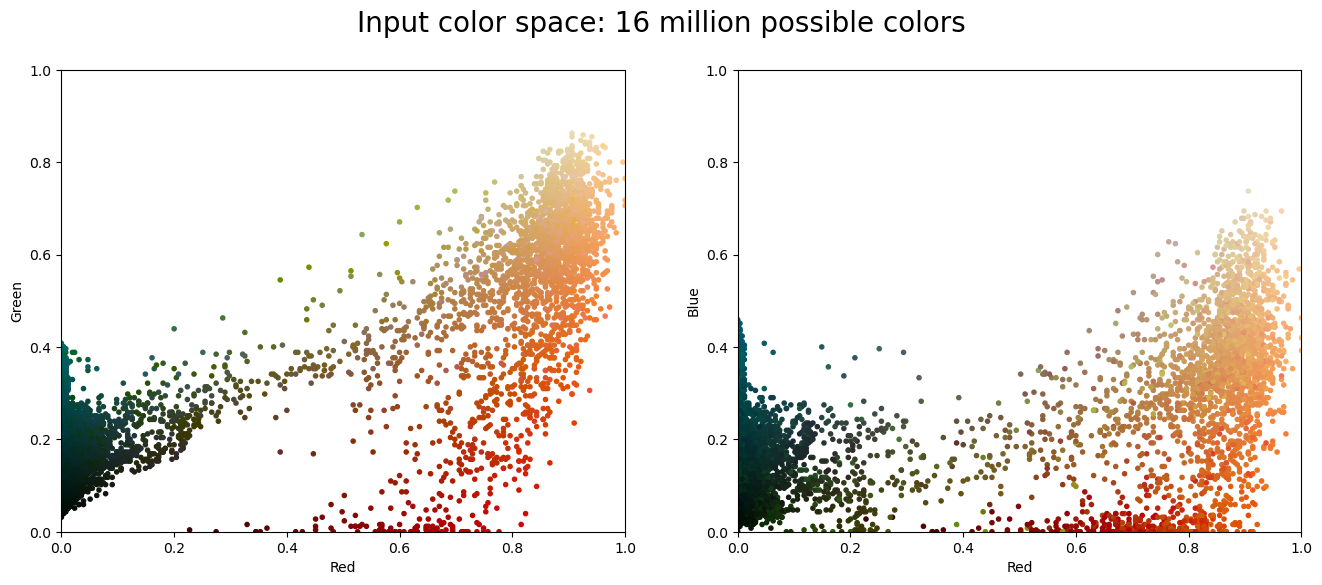

In [19]:
plot_pixels(data, title='Input color space: 16 million possible colors')

### Step 4 - Make K-Means Model

Result,


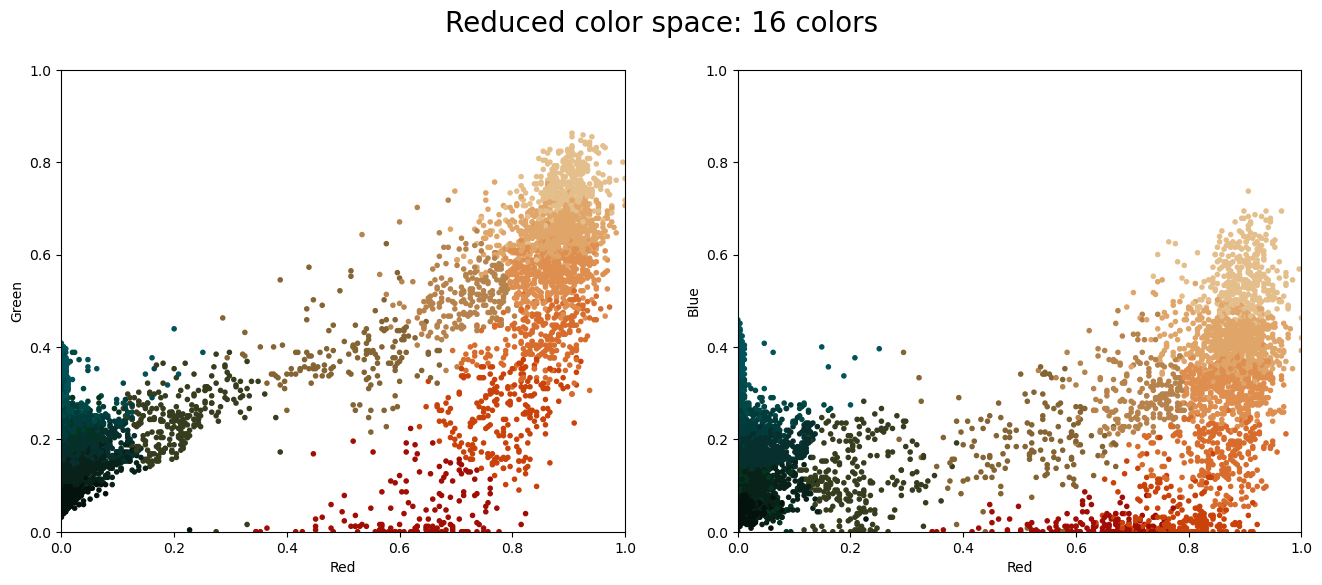

In [20]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

print('Result,')
plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

### Step 5 - Visualize The Result

Result,


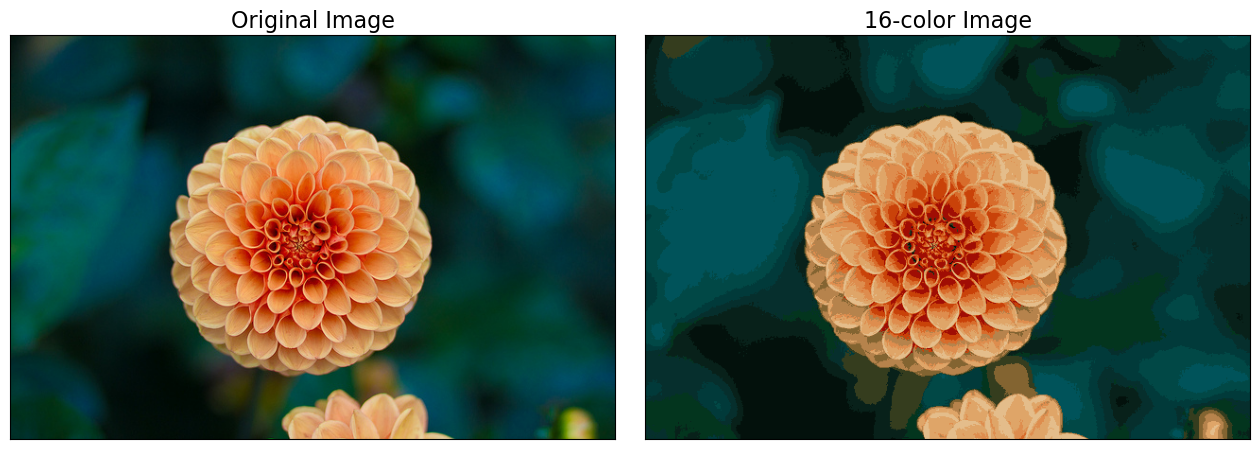

In [21]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
print('Result,')
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Lab Work 3
*Self-Organizing Map (SOM)*

### Step 0 - Install Minisom

In [23]:
pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=135f87df2adbc88d4ea0a03745045550e7363adba18ccc05ed776ee65a4638c7
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\28\e3\3d\707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


### Step 1 - Import Library

In [24]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Step 2 - Load Iris Dataset

In [25]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

### Step 3 - Normalize Data

In [26]:
# Normalize Data
data = data / data.max(axis=0)

### Step 4 - Make SOM Model

In [27]:
# Initiate SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Step 4.1 - Initiatie Random Weight for SOM

In [28]:
# Initiate random weight
som.random_weights_init(data)

Step 4.2 - Fit Model

In [29]:
# Fit SOM
num_epochs = 100
som.train_random(data, num_epochs)

### Step 5 - Visualize SOM Network

Result,


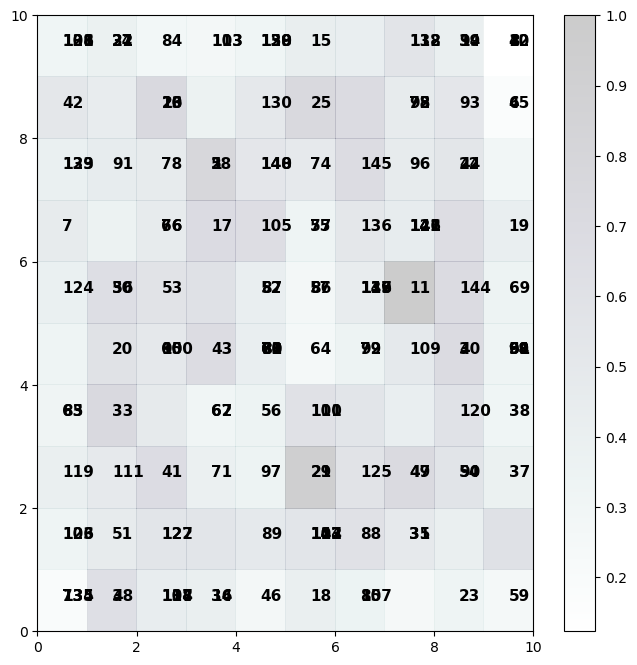

In [30]:
# SOM Visualization
plt.figure(figsize=(8, 8))
print('Result,')
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

# Lab Assignment

## Tasks

Create a K-Means model with the following conditions:
1. Use the 'Mall_Customers.csv' data.
2. Determine the appropriate features for clustering (at least 2).
3. Create a K-Means model considering the best number of clusters.
4. Reimplement the model by using SOM.

Step 1 - Import Library

In [32]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
df = pd.read_csv('C:\Machine Learning\week7\Mall_Customers.csv')

# Peek Data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

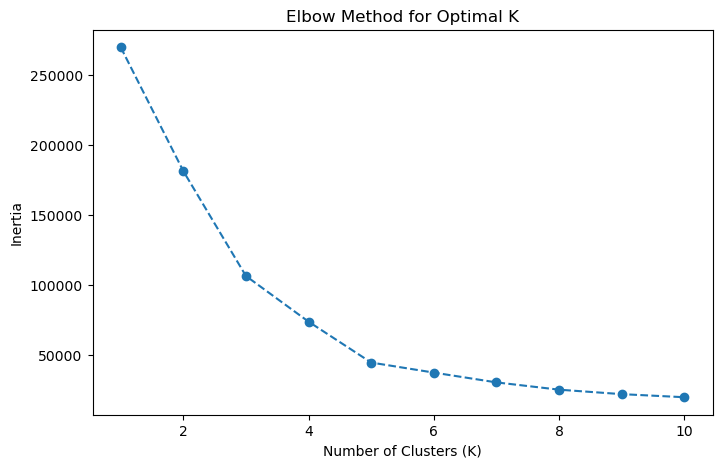

In [34]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Step 2 - Create K means model

In [35]:
# Create the K-Means model with K=5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

Step 3 - Plot Cluster

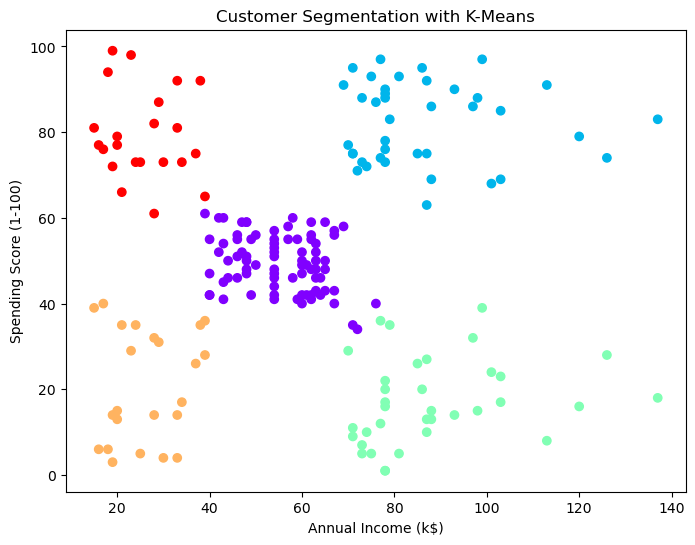

In [36]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with K-Means')
plt.show()

Check the value of SSE

In [37]:
print(f'SSE: {kmeans.inertia_}')

SSE: 44448.45544793371


Step 4 - Implement the Elbow method

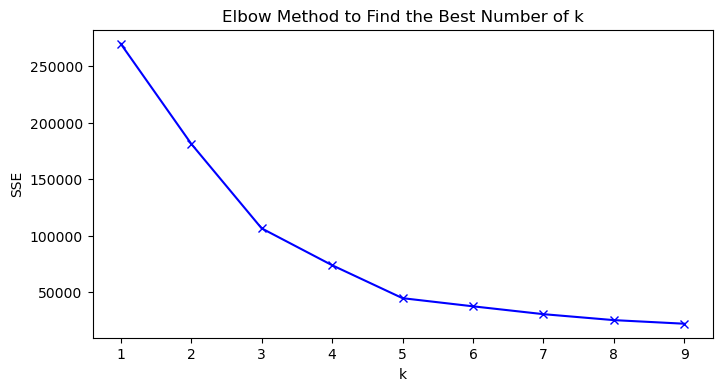

In [38]:
# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find the Best Number of k")
plt.show()

Check the value for each K

In [39]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.59595959596
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948834
k=5; SSE=44448.45544793371
k=6; SSE=37233.81451071001
k=7; SSE=30273.394312070042
k=8; SSE=24995.969781135962
k=9; SSE=21806.81299869546


Step 1 - Import Library

In [40]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

Step 2 - Implement SOM

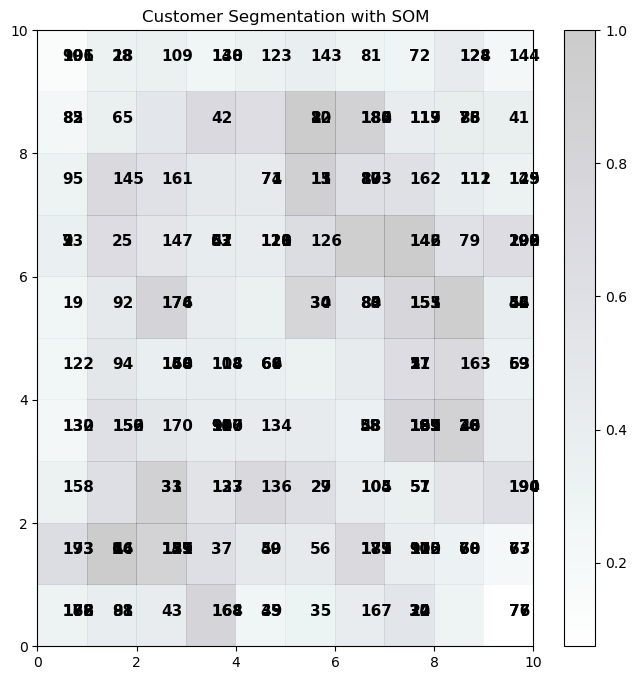

In [41]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

# Initialize SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], normalized_data.shape[1], sigma=0.5, learning_rate=0.5)

# Initialize random weights
som.random_weights_init(normalized_data)

# Train SOM
num_epochs = 100
som.train_random(normalized_data, num_epochs)

# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(normalized_data):
    w = som.winner(x)  # Winning neuron for sample x
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i + 1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.2)
plt.colorbar()
plt.title('Customer Segmentation with SOM')
plt.show()